# Analysis of Energy Demand

The assignment will focus on data visualisation using pandas library.

In this assignment, I will be analysing a dataset from the UK government detailing energy consumption across various sectors of industry. This assignment will focus on the transformation of data and subsequent creation of charts using pandas.
During this project I learnt and recapped the following skills:
- Researching how to change data types for multiple columns in one go, such as creating a dictionary **(as seen in Q1)**
- Creating a new df, based on using the .groupby() method
- Using the .agg() method to perform a nuber of aggregation functions across columns
- Create a histogram from a specific column of a DataFrame using the .plot() method
- Create a scatter plot of a column vs a column, to see the relationship between the two values
- Create a bar chart of the sum column of the sector DataFrame using the .plot() method
- Create a horizontal and stacked bar chart from the 'use' DataFrame, using the .plot() method

### Importing Libraries
Run the cell below first, to import `pandas`, and `matplotlib` `pyplot`. The `matplotlib_axes_logger.setLevel('ERROR')` code prevents some unnecessary warnings from showing.

In [2]:
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### About the Dataset

In the following section, you will be analysing a data from the UK government detailing energy consumption across various sectors of industry. 

The dataset includes information about:

- Sector - sectors of industry         
- Sub -Sector - a sector that is part of a larger sector       
- Electricity - energy consumption measured in kilowatt hour (kWh)     
- Natural Gas - energy consumption measured in kilowatt hour (kWh)     
- Oil - energy consumption measured in kilowatt hour (kWh)              
- District Heating - is a system for distributing heat generated in a centralised location through a system of insulated pipes, measured in kilowatt hour (kWh)
- Other - other energy sources measured in kilowatt hour (kWh) 

### Data collection

We have written some code below to do some initial collation and cleaning of the datasets we'll be working with - see if you can follow along and understand what each line is doing.

Run the following cell to import and concatenate the datasets, assigning the result to DataFrame `data`:

In [3]:
df1 = pd.read_csv('data/heating_2018.csv')
df2 = pd.read_csv('data/hot_water_2018.csv')
df3 = pd.read_csv('data/catering_2018.csv')
data = pd.concat([df1, df2, df3], keys=['Heating', 'Hot Water', 'Catering']).reset_index(level=[0])

Running `data.head()`, `data.sample()` and  `data.info()` will show us how the DataFrame is structured:

In [4]:
data.head()

,level_0,Sector,Sub-Sector,Electricity,Natural Gas,Oil,District Heating,Other
0,Heating,"Arts, leisure and community",Clubs & community centres,14,139,60,8.0,NaN
1,Heating,"Arts, leisure and community",Leisure Centres,5,159,7,18.0,NaN
2,Heating,"Arts, leisure and community",Museums,2,12,3,0.0,NaN
3,Heating,"Arts, leisure and community",Places of Worship,29,377,110,13.0,NaN
4,Heating,"Arts, leisure and community",Theatres,1,35,2,0.0,NaN


In [5]:
data.sample(5)

,level_0,Sector,Sub-Sector,Electricity,Natural Gas,Oil,District Heating,Other
32,Hot Water,Storage,Cold Stores,0,2,0,0.0,0.0
28,Heating,Retail,Large non-food shops,57,55,0,0.0,NaN
16,Catering,Health,Nursing Homes,2,4,2,NaN,NaN
31,Catering,Retail,Small shops,9,2,21,NaN,NaN
10,Catering,Emergency Services,Fire and Ambulance stations,1,0,0,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 35
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level_0           108 non-null    object 
 1   Sector            108 non-null    object 
 2   Sub-Sector        108 non-null    object 
 3   Electricity       108 non-null    int64  
 4   Natural Gas       108 non-null    int64  
 5   Oil               108 non-null    int64  
 6   District Heating  72 non-null     float64
 7   Other             36 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 7.6+ KB


### Data processing

**Q1.** First of all, let's tidy up the `data` DataFrame:

- Use the `.rename()` method to change the name of the `level_0` column to `Use`
- Use the `.fillna()` method to update all `NaN` values to `0`
- Use the `astype()` method to convert all numerical columns `['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other']` to integers
- Create a new column `Total` which contains the sum of all numerical columns.

KATE will evaluate your updated version of `data` to check these changes have been made.


In [7]:
#add your code to update the `data` DataFrame below
data.rename(columns={'level_0': 'Use'}, inplace=True)
data.fillna(0,inplace=True)

convert_dict = {'Electricity': int,
                'Natural Gas': int,
                'Oil': int,
                'District Heating' : int,
                'Other' : int
                }

data = data.astype(convert_dict)
data.info()
data['Total'] = data['Electricity'] + data['Natural Gas'] + data['Oil'] + data['District Heating'] + data['Other']
data.sample(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 35
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Use               108 non-null    object
 1   Sector            108 non-null    object
 2   Sub-Sector        108 non-null    object
 3   Electricity       108 non-null    int64 
 4   Natural Gas       108 non-null    int64 
 5   Oil               108 non-null    int64 
 6   District Heating  108 non-null    int64 
 7   Other             108 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 7.6+ KB


,Use,Sector,Sub-Sector,Electricity,Natural Gas,Oil,District Heating,Other,Total
35,Hot Water,Storage,Warehouses,9,12,9,0,3,33
6,Hot Water,Education,State Primary schools,14,63,16,0,0,93
18,Catering,Hospitality,Hotels,41,31,113,0,0,185
32,Heating,Storage,Cold Stores,0,0,0,0,0,0
6,Catering,Education,State Primary schools,19,16,4,0,0,39


### Data grouping

**Q2.** Create a new DataFrame called `ss`, using `.groupby()` to group DataFrame `data` by column `Sub-Sector`, which contains the `.sum()` for each of the numerical (energy type) columns for each group:

```python
DataFrame_Name.groupby(by=...).sum() 
```

In [18]:
#add your code below
ss = data.groupby(['Sub-Sector'])[['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other', 'Total']].sum()

ss.tail()


,Electricity,Natural Gas,Oil,District Heating,Other,Total
Sub-Sector,,,,,,
Stores,9,33,15,0,1,58
Theatres,2,37,3,0,1,43
Uni - Non-residential,20,308,0,46,0,374
Uni - Residential,9,85,16,39,0,149
Warehouses,56,404,651,0,3,1114


**Q3.** Create a new DataFrame called `use`, using `.groupby()` to group DataFrame `data` by column `Use`, which contains the `.sum()` for each of the numerical (energy type) columns for each group:

```python
DataFrame_Name.groupby(by=...).sum() 
```

In [9]:
#add your code below
use = data.groupby(['Use'])[['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other', 'Total']].sum()
use.head()


,Electricity,Natural Gas,Oil,District Heating,Other,Total
Use,,,,,,
Catering,758,587,800,0,0,2145
Heating,762,6044,1602,265,0,8673
Hot Water,160,801,257,17,109,1344


**Q4.** Create a new DataFrame called `sector`, using `.groupby()` to group DataFrame `data` by column `Sector`, and `.agg()` on the `Total` column such that the new DataFrame has columns for `sum`, `mean`, and `count` of the values in `Total`:

```python
DataFrame_Name.groupby(by=...)[column].agg([...]) 
```
- Use the `sort_values()` method to sort the resulting DataFrame by `sum`, in *descending* order

- You may find [this documentation page](https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) useful

In [19]:
sector = data.groupby(['Sector'])['Total'].agg(['sum', 'mean', 'count'])
sector.sort_values('sum', ascending=False, inplace=True)
sector

,sum,mean,count
Sector,,,
Hospitality,2371,197.583333,12
Education,1837,122.466667,15
Offices,1773,295.500000,6
Health,1488,165.333333,9
Retail,1402,77.888889,18
Storage,1340,111.666667,12
"Arts, leisure and community",1205,80.333333,15
Emergency Services,503,41.916667,12
Military,243,27.000000,9


*You may want to submit your notebook to KATE to ensure your `data`, `ss`, and `use` and `sector` DataFrames are as expected before moving on to the visualisations.*

### Data visualisation

**Q5.** Create a **histogram** from the `Electricity` column of `ss` DataFrames using the `.plot()` method:
- The histogram should have 5 `bins`
- Assign the plot to the variable `elec_hist`
- Ensure your code cell starts with `plt.figure()`

```python
plt.figure() 
elec_hist = DataFrame_Name.plot(kind=..., bins=...);
```

*We need to execute `plt.figure()` before creating each new plot in the notebook, otherwise the properties of previous plots will be overwritten in memory and KATE will not evaluate them correctly.*

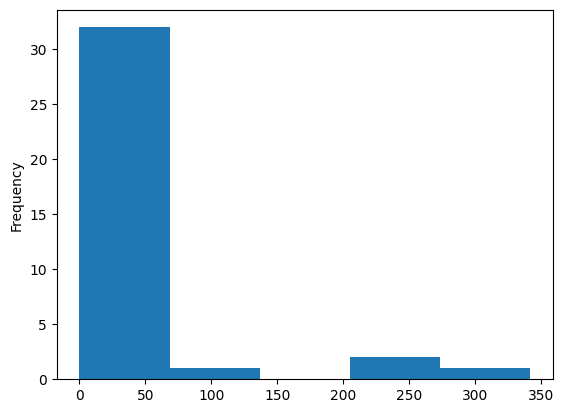

In [11]:
#add your code below
plt.figure()
elec_hist = ss['Electricity'].plot(kind='hist', bins=5)


# df['Popularity'].plot(kind='hist', bins=10)


**Q6.** Create a **scatter plot** of `Natural Gas` vs `Total`, to see the relationship between the two values.

- Use the `.plot()` method on `ss`
- Have `Natural Gas` on the x-axis and `Total` on the y-axis
- Assign the plot to the variable `gas_total`
- Ensure your code cell starts with `plt.figure()`

```python
DataFrame_Name.plot(x=..., y=..., kind=...);
```

<Figure size 640x480 with 0 Axes>

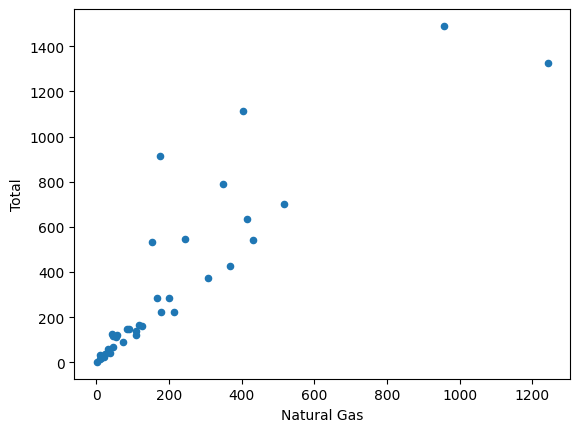

In [12]:
#add your code below
plt.figure()
gas_total = ss.plot(x='Natural Gas', y='Total', kind='scatter');




# df.plot(x='Birth rate(births/1000 population)', 
#         y='Infant mortality rate(deaths/1000 live births)', 
#         kind='scatter');

**Q7.** Create a **bar chart** of the `sum` column of the `sector` DataFrame using the `.plot()` method:

- Add a title of `Energy consumption by sector` to the plot
- Assign the plot to the variable `sector_sum`
- Ensure your code cell starts with `plt.figure()`

```python
DataFrame_Name.plot(kind=..., title=...);
```

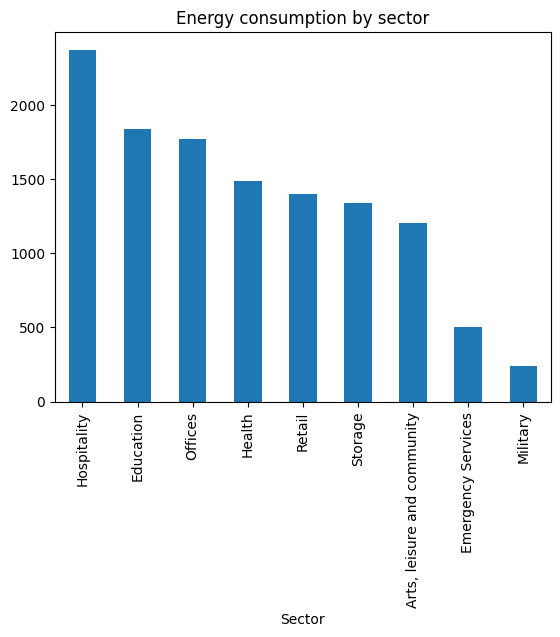

In [13]:
#add your code below
plt.figure()
sector_sum = sector['sum'].plot(kind='bar', title='Energy consumption by sector')


# df['Income group'].value_counts().plot(kind='bar');

**Q8.** Create a *horizontal* and *stacked* bar chart from the `use` DataFrame, using the `.plot()` method:

- Do not include the `Total` column values
- Assign the plot to the variable `use_type`
- Give it a `figsize` of `(12, 12)`
- You may find [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) useful
- Ensure your code cell starts with `plt.figure()`

```python
DataFrame_Name.plot.barh(stacked=True, figsize=(...));
```

<Figure size 640x480 with 0 Axes>

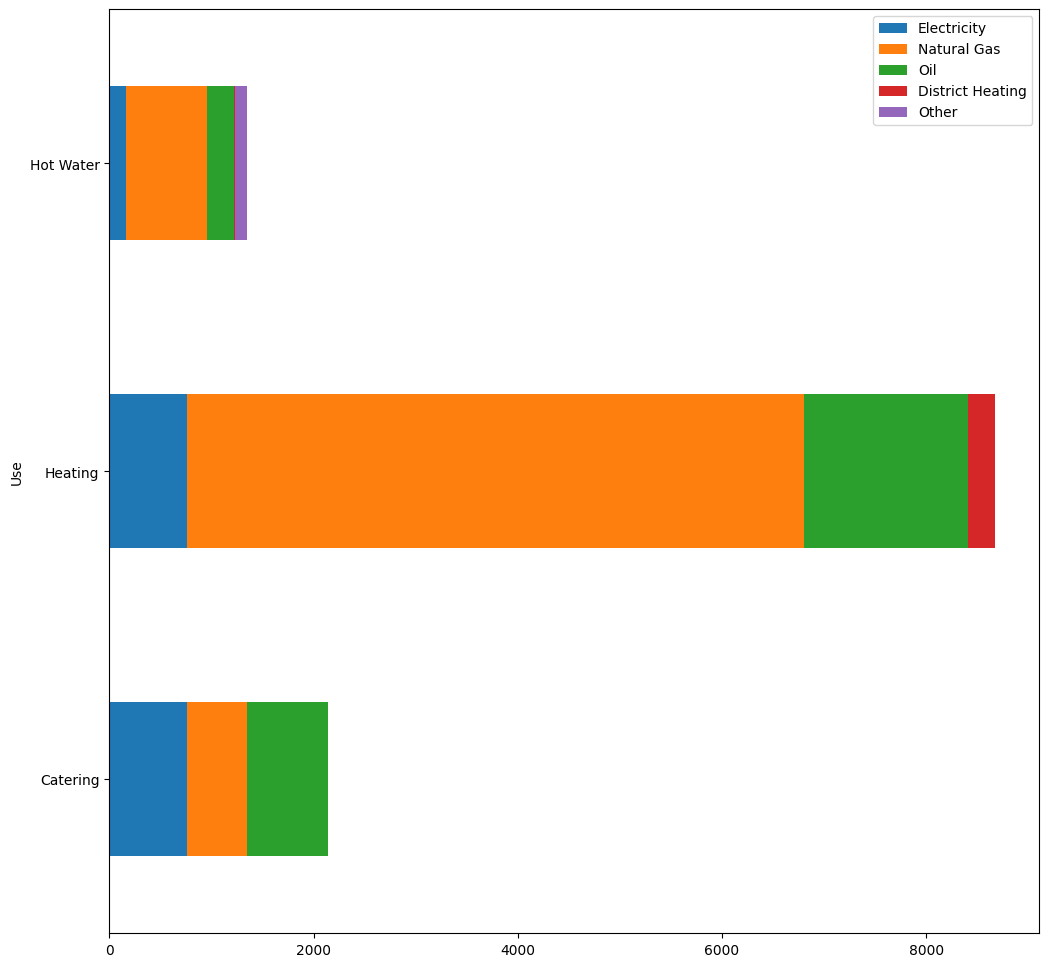

In [14]:
#add your code below
plt.figure()
use_type = use[['Electricity', 'Natural Gas', 'Oil', 'District Heating', 'Other']].plot.barh(stacked=True, figsize=(12,12));

